In [310]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,metrics 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_validate   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV    #Perforing grid search
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer


In [311]:
loan_train= pd.read_csv('D:/DataScienceCompetition/Loan Prediction/Train/loan_train.csv',sep=',',
                           header=0,  engine='python')

In [312]:
loan_test= pd.read_csv('D:/DataScienceCompetition/Loan Prediction/Test/loan_test.csv',sep=',',
                           header=0,  engine='python')

In [313]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [314]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
#Check data types of the column

loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [207]:
#Check data types of the column

loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [204]:
totrecord_train = len(loan_train) #no of records in train data

# Print the results
print (totrecord_train)

614


In [205]:
totrecord_test = len(loan_test) #no of records in train data

# Print the results
print (totrecord_test)

367


In [206]:
# Check missing data in train file
loan_train.isnull().sum(axis=0)/loan_train.shape[0]

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
# Check missing data in test file
loan_test.isnull().sum(axis=0)/loan_test.shape[0]

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64

In [43]:
# Check value of the each category
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
# Check value of the each category
loan_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [14]:
#Describe Total Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
#Describe Total Data
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [12]:
# Describe for a category
loan_train[loan_train['Gender'] == 'Male'].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,489.000000,489.000000,470.000000,478.000000,451.000000
mean,5446.460123,1742.932352,149.265957,339.665272,0.847007
std,6185.789262,2606.507054,82.810851,67.089140,0.360381
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2917.000000,0.000000,104.000000,360.000000,1.000000
50%,3865.000000,1430.000000,130.000000,360.000000,1.000000
75%,5923.000000,2436.000000,175.000000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


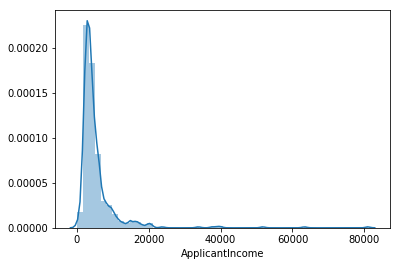

In [8]:
# Distribution Plot
sns.distplot(loan_train['ApplicantIncome'])#.apply(lambda x: np.log1p(x)**2))

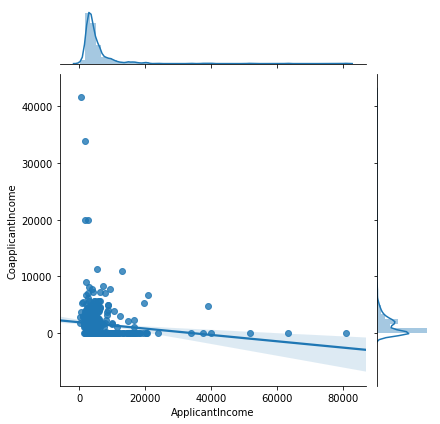

In [27]:
# Bivariate Plot
sns.jointplot(loan_train['ApplicantIncome'], loan_train['CoapplicantIncome'], kind='reg')

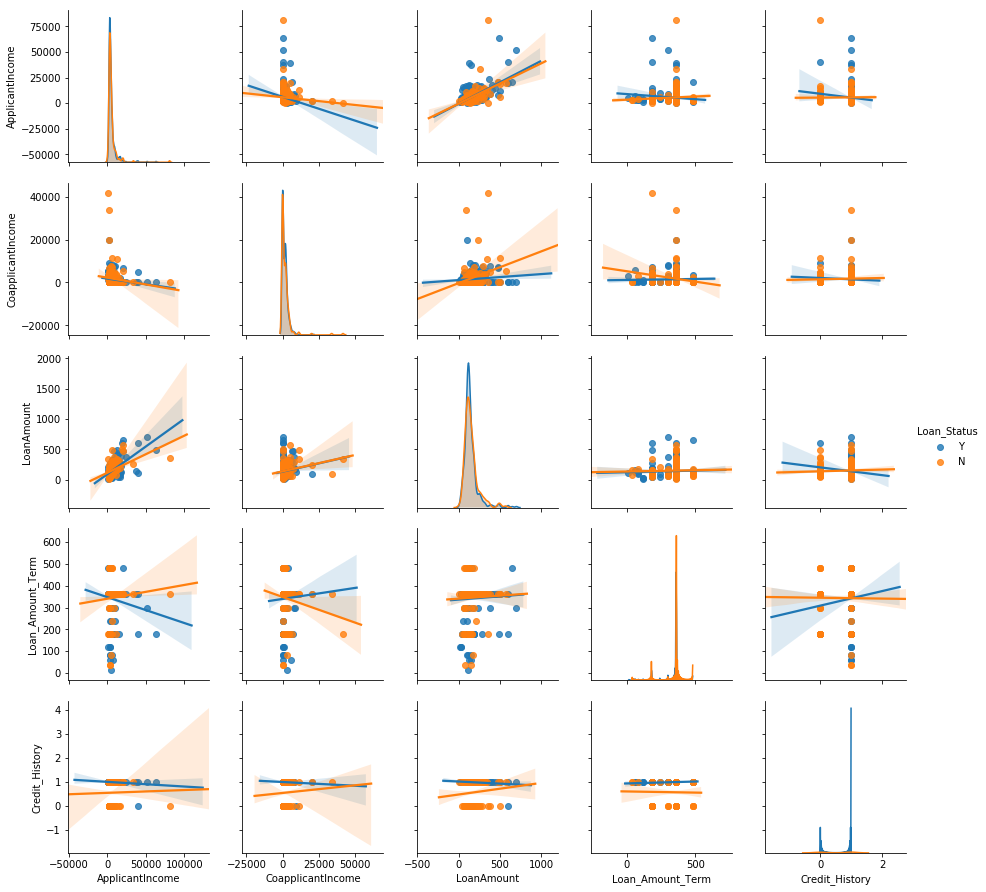

In [49]:
# Pair Plot
#sns.pairplot(loan_train)
sns.pairplot(loan_train, hue='Loan_Status', kind='reg')

In [31]:
# Corrlation Matrix
#loan_train.corr()
loan_test.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


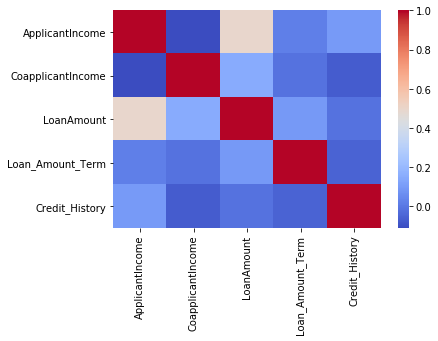

In [33]:
# Heatmap
#sns.heatmap(loan_train.corr(), cmap='coolwarm')
sns.heatmap(loan_test.corr(), cmap='coolwarm')

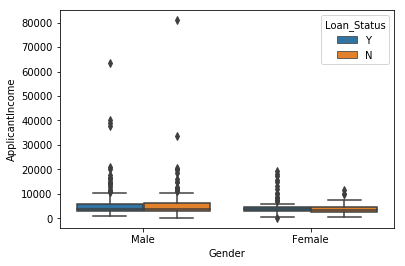

In [37]:
#Categorica data for explore data further

sns.boxplot(x="Gender", y="ApplicantIncome", hue="Loan_Status", data=loan_train);

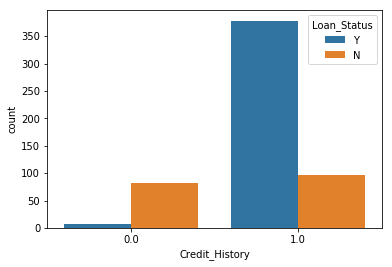

In [44]:
# Analys loan status based on categorical variable

sns.countplot(x='Credit_History',hue="Loan_Status",data=loan_train)

# Feature Engineering

In [315]:
loan_train1=pd.DataFrame(loan_train)
loan_test1=pd.DataFrame(loan_test)

In [316]:
# Replace missing values on train data

loan_train1.fillna(loan_train1.median(), inplace=True)
loan_train1['Gender']=loan_train1['Gender'].fillna('Gmissing')
loan_train1['Married']=loan_train1['Married'].fillna('Mmissing')
loan_train1['Self_Employed']=loan_train1['Self_Employed'].fillna('Smissing')


In [317]:
loan_train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [318]:
# Replace missing values on test data

loan_test1.fillna(loan_test1.median(), inplace=True)
loan_test1['Gender']=loan_test1['Gender'].fillna('Gmissing')
loan_test1['Married']=loan_test1['Married'].fillna('Mmissing')
loan_test1['Self_Employed']=loan_test1['Self_Employed'].fillna('Smissing')



In [319]:
loan_train1.isnull().sum(axis=0)/loan_train1.shape[0]

Loan_ID              0.00000
Gender               0.00000
Married              0.00000
Dependents           0.02443
Education            0.00000
Self_Employed        0.00000
ApplicantIncome      0.00000
CoapplicantIncome    0.00000
LoanAmount           0.00000
Loan_Amount_Term     0.00000
Credit_History       0.00000
Property_Area        0.00000
Loan_Status          0.00000
dtype: float64

In [320]:
# Apply log tranformation training data

loan_train1['ApplicantIncomelog']=loan_train1['ApplicantIncome'].apply(lambda x: np.log1p(x)**2)
loan_train1['CoapplicantIncomelog']=loan_train1['CoapplicantIncome'].apply(lambda x: np.log1p(x)**2)
loan_train1['LoanAmountlog']=loan_train1['LoanAmount'].apply(lambda x: np.log1p(x)**2)
loan_train1['Loan_Amount_Termlog']=loan_train1['Loan_Amount_Term'].apply(lambda x: np.log1p(x)**2)


In [321]:
# Apply log tranformation on test data

loan_test1['ApplicantIncomelog']=loan_test1['ApplicantIncome'].apply(lambda x: np.log1p(x)**2)
loan_test1['CoapplicantIncomelog']=loan_test1['CoapplicantIncome'].apply(lambda x: np.log1p(x)**2)
loan_test1['LoanAmountlog']=loan_test1['LoanAmount'].apply(lambda x: np.log1p(x)**2)
loan_test1['Loan_Amount_Termlog']=loan_test1['Loan_Amount_Term'].apply(lambda x: np.log1p(x)**2)



In [322]:
# Apply scaling on train data
in_column=['ApplicantIncome','CoapplicantIncome']
out_column=['ApplicantIncomeRob','CoapplicantIncomeRob']
#loan_train1.drop([out_column],axis=1,inplace=True)

robust = RobustScaler()
loan_train1=loan_train1.join(pd.DataFrame(robust.fit_transform(loan_train1[in_column]),columns=out_column))
loan_train1.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncomeRob,CoapplicantIncomeRob
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,75.241693,0.000000,23.617777,34.678884,0.698029,-0.517358
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,71.070418,53.570725,23.617777,34.678884,0.264096,0.139079
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,64.107258,0.000000,17.679440,34.678884,-0.278492,-0.517358
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,61.733924,60.310649,22.999607,34.678884,-0.421422,0.509087
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,75.684456,0.000000,24.560222,34.678884,0.749786,-0.517358


In [323]:
# Apply scaling on test data
in_column=['ApplicantIncome','CoapplicantIncome']
out_column=['ApplicantIncomeRob','CoapplicantIncomeRob']
#loan_train1.drop([out_column],axis=1,inplace=True)

robust = RobustScaler()
loan_test1=loan_test1.join(pd.DataFrame(robust.fit_transform(loan_test1[in_column]),columns=out_column))
loan_test1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncomeRob,CoapplicantIncomeRob
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,74.855354,0.000000,22.179675,34.678884,0.880692,-0.421724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,64.508372,53.492941,23.466149,34.678884,-0.323315,0.195433
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,72.545986,56.191475,28.540535,34.678884,0.552823,0.318864
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,60.191738,61.507496,21.299337,34.678884,-0.658470,0.625797
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,65.523903,0.000000,19.092075,34.678884,-0.232240,-0.421724


In [324]:
# Bin Numerical variables
bins = [0, 1000, 3000, 7000, 15000,30000,100000]
labels =[1,2,3,4,5,6]

loan_train1['ApplicantIncomeBin'] = pd.cut(loan_train1['ApplicantIncome'], bins,labels=labels)
loan_train1['CoapplicantIncomeBin'] = pd.cut(loan_train1['CoapplicantIncome'], bins,labels=labels)
loan_train1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncomeRob,CoapplicantIncomeRob,ApplicantIncomeBin,CoapplicantIncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,Urban,Y,75.241693,0.000000,23.617777,34.678884,0.698029,-0.517358,3,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,71.070418,53.570725,23.617777,34.678884,0.264096,0.139079,3,2.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,64.107258,0.000000,17.679440,34.678884,-0.278492,-0.517358,2,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,61.733924,60.310649,22.999607,34.678884,-0.421422,0.509087,2,2.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,75.684456,0.000000,24.560222,34.678884,0.749786,-0.517358,3,NaN


In [325]:
# Bin Numerical variables test data
bins = [0, 1000, 3000, 7000, 15000,30000,100000]
labels =[1,2,3,4,5,6]

loan_test1['ApplicantIncomeBin'] = pd.cut(loan_test1['ApplicantIncome'], bins,labels=labels)
loan_test1['CoapplicantIncomeBin'] = pd.cut(loan_test1['CoapplicantIncome'], bins,labels=labels)
loan_test1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,ApplicantIncomeRob,CoapplicantIncomeRob,ApplicantIncomeBin,CoapplicantIncomeBin
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,74.855354,0.000000,22.179675,34.678884,0.880692,-0.421724,3,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,64.508372,53.492941,23.466149,34.678884,-0.323315,0.195433,3,2.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,72.545986,56.191475,28.540535,34.678884,0.552823,0.318864,3,2.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,60.191738,61.507496,21.299337,34.678884,-0.658470,0.625797,2,2.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,65.523903,0.000000,19.092075,34.678884,-0.232240,-0.421724,3,NaN


In [326]:
# Apply label encoding on train data
cat_cols=['Education']
le = LabelEncoder()
for col in cat_cols:
    loan_train1[cat_cols] = le.fit_transform(loan_train1[cat_cols])


In [327]:
# Apply label encoding test data
cat_cols1=['Education']
le = LabelEncoder()
loan_test1[cat_cols1] = le.fit_transform(loan_test1[cat_cols1])

In [328]:
# Apply hot encoding on train data
cat_cols=['Gender','Self_Employed','Property_Area']
for col in cat_cols:
     #loan_train1=loan_train1.join(pd.get_dummies(loan_train1[col],prefix='c'))
    loan_train1 = pd.concat([loan_train1,pd.get_dummies(loan_train1[col])],axis=1)
loan_train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,CoapplicantIncomeBin,Female,Gmissing,Male,No,Smissing,Yes,Rural,Semiurban,Urban
0,LP001002,Male,No,0,0,No,5849,0.0,128.0,360.0,...,NaN,0,0,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,...,2.0,0,0,1,1,0,0,1,0,0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,...,NaN,0,0,1,0,0,1,0,0,1
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,...,2.0,0,0,1,1,0,0,0,0,1
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,...,NaN,0,0,1,1,0,0,0,0,1


In [329]:
# Apply hot encoding on train data
cat_cols=['Gender','Property_Area']
for col in cat_cols:
     #loan_test1=loan_test1.join(pd.get_dummies(loan_test1[col]))
    loan_test1 = pd.concat([loan_test1,pd.get_dummies(loan_test1[col])],axis=1)
loan_test1.head()
    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,ApplicantIncomeRob,CoapplicantIncomeRob,ApplicantIncomeBin,CoapplicantIncomeBin,Female,Gmissing,Male,Rural,Semiurban,Urban
0,LP001015,Male,Yes,0,0,No,5720,0,110.0,360.0,...,0.880692,-0.421724,3,NaN,0,0,1,0,0,1
1,LP001022,Male,Yes,1,0,No,3076,1500,126.0,360.0,...,-0.323315,0.195433,3,2.0,0,0,1,0,0,1
2,LP001031,Male,Yes,2,0,No,5000,1800,208.0,360.0,...,0.552823,0.318864,3,2.0,0,0,1,0,0,1
3,LP001035,Male,Yes,2,0,No,2340,2546,100.0,360.0,...,-0.658470,0.625797,2,2.0,0,0,1,0,0,1
4,LP001051,Male,No,0,1,No,3276,0,78.0,360.0,...,-0.232240,-0.421724,3,NaN,0,0,1,0,0,1


In [335]:
Predictors=['ApplicantIncomeRob','CoapplicantIncomeRob','LoanAmountlog','Loan_Amount_Termlog','Credit_History']
Target=['Loan_Status']
X_train=loan_train1[Predictors]
Y_train=loan_train1[Target]

In [336]:
# Convert dataset into train and test
state = 12  
test_size = 0.33 
  
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train,  
    test_size=test_size, random_state=state)


In [337]:
# Build Gradient Clasifier
#lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
esti=[10, 30, 40, 50, 70, 80, 90, 100]
for estimators in esti:
    gb_clf = GradientBoostingClassifier(n_estimators=estimators, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("estimators: ", estimators)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

estimators:  10
Accuracy score (training): 0.696
Accuracy score (validation): 0.695
estimators:  30
Accuracy score (training): 0.830
Accuracy score (validation): 0.793
estimators:  40
Accuracy score (training): 0.830
Accuracy score (validation): 0.793
estimators:  50
Accuracy score (training): 0.830
Accuracy score (validation): 0.793
estimators:  70
Accuracy score (training): 0.835
Accuracy score (validation): 0.793
estimators:  80
Accuracy score (training): 0.835
Accuracy score (validation): 0.788
estimators:  90
Accuracy score (training): 0.835
Accuracy score (validation): 0.788
estimators:  100
Accuracy score (training): 0.837
Accuracy score (validation): 0.783


In [ ]:
# Predict using gradient Classifier


url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json'
datajson=pd.read_json(url, orient='columns')
